In [44]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [45]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
query = "(#elearning) lang:en until:2022-06-01 since:2020-01-01"
tweets = []

limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  # print(tweet)
  # break
  if len(tweets) == limit:
    break
  else:
    tweets.append([tweet.content])

df = pd.DataFrame(tweets, columns=['Tweet'])
print(df)

                                                  Tweet
0     New to online teaching? Here's what to expect ...
1     React and Next. js with Typescript: A Rapid Gu...
2     First get some @SeriousPlayUCF, then get #cert...
3     Complete Node js Developer Course in Tamil htt...
4     Supercharge your digital training https://t.co...
...                                                 ...
4995  Brazil to become major global solar market by ...
4996  The latest The AtTechEdu Daily! https://t.co/d...
4997  Expand your knowledge in #FiberComposites anal...
4998  Gamification has been around for quite some ti...
4999  One of our sister projects @FairchainEU has or...

[5000 rows x 1 columns]


In [47]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes the mentioned
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)# rt is retweets in twitter so i removed it.
  text = re.sub(r'https?:\/\/\S+', '', text) 

  return text

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['Tweet'] = df['Tweet'].apply(cleanTxt)
df['Tweet'] = df['Tweet'].apply(remove_emoji)
print(df)

                                                  Tweet
0     New to online teaching? Here's what to expect ...
1     React and Next. js with Typescript: A Rapid Gu...
2     First get some , then get certified! Serious p...
3     Complete Node js Developer Course in Tamil    ...
4     Supercharge your digital training   feat  trai...
...                                                 ...
4995  Brazil to become major global solar market by ...
4996  The latest The AtTechEdu Daily!  edtech elearning
4997  Expand your knowledge in FiberComposites analy...
4998  Gamification has been around for quite some ti...
4999  One of our sister projects  has organised this...

[5000 rows x 1 columns]


In [48]:
#a function to get the subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#a function to get the polarity

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#creating two new columns 
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['polarity'] = df['Tweet'].apply(getpolarity)

#new dataframe
df

,Tweet,Subjectivity,polarity
0,New to online teaching? Here's what to expect ...,0.454545,0.136364
1,React and Next. js with Typescript: A Rapid Gu...,0.300000,0.200000
2,"First get some , then get certified! Serious p...",0.600000,0.153883
3,Complete Node js Developer Course in Tamil ...,0.400000,0.100000
4,Supercharge your digital training feat trai...,0.000000,0.000000
...,...,...,...
4995,Brazil to become major global solar market by ...,0.250000,0.031250
4996,The latest The AtTechEdu Daily! edtech elearning,0.450000,0.250000
4997,Expand your knowledge in FiberComposites analy...,0.600000,0.400000
4998,Gamification has been around for quite some ti...,0.500000,0.500000


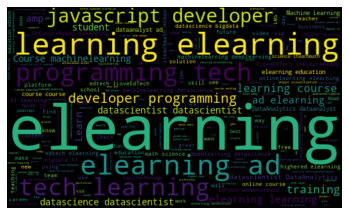

In [49]:
#word cloud 
allWords = ' '.join( [twts for twts in df['Tweet']] )
wordCloud = WordCloud(width = 500, height = 300, random_state= 21, max_font_size=100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()



In [51]:
#fucntion for negative, neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['polarity'].apply(getAnalysis)

df

,Tweet,Subjectivity,polarity,Analysis
0,New to online teaching? Here's what to expect ...,0.454545,0.136364,Positive
1,React and Next. js with Typescript: A Rapid Gu...,0.300000,0.200000,Positive
2,"First get some , then get certified! Serious p...",0.600000,0.153883,Positive
3,Complete Node js Developer Course in Tamil ...,0.400000,0.100000,Positive
4,Supercharge your digital training feat trai...,0.000000,0.000000,Neutral
...,...,...,...,...
4995,Brazil to become major global solar market by ...,0.250000,0.031250,Positive
4996,The latest The AtTechEdu Daily! edtech elearning,0.450000,0.250000,Positive
4997,Expand your knowledge in FiberComposites analy...,0.600000,0.400000,Positive
4998,Gamification has been around for quite some ti...,0.500000,0.500000,Positive


In [60]:
#printing positives
j=1
sortedDF_p = df.sort_values(by=['polarity'])
for i in range(0, sortedDF_p.shape[0]):
  if(sortedDF_p['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF_p['Tweet'][i])
    print()
    j=j+1

Streaming output truncated to the last 5000 lines.
-

mylearningtv elearning education onlinelearning 

1473)Client Spotlight  _barrett  Discover how our Totara solution has helped launch Holland &amp; Barrett into a whole new way of training whilst reducing their costs:  
Totara LMS TotaraLMS Elearning 

1474)Your children will learn English:

Don't hesitate and sign up with Sagson Education Portal to start a new way of Learning English for your kids.


Newworldforlearning
sagson sagsonportal  distancelearning learning elearning education onlinecourses 

1475)10 ways to help anxious students with elearning  | 3. Be approachable, so your online learners will be comfortable asking for help. 

1476)Q-Pulse WorkRite is our e-learning management software, designed to help you keep your workplace safe, healthy and happy. Find out more in our brochure:  eLMS eLearning 

1477)Now introducing: Health and Safety eLearning!

This high quality and interactive e-Learning allows learners to expand 

In [61]:
#printing Negatives
j=1
sortedDF_n = df.sort_values(by=['polarity'], ascending = 'False')
for i in range(0, sortedDF_n.shape[0]):
  if(sortedDF_n['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF_n['Tweet'][i])
    print()
    j=j+1

1)Every instructionaldesign model, every teaching method, and every new flavor of learning technology has an acronym. Why? It all comes down to marketing.  edtech elearning LMS

2)Summer is almost here! 

What plans are you looking forward to? Or are you looking forward to having no plans at all?

Remember: You've worked so hard all year–you deserve this time to rest and recharge!!
edtech elearning educationmatters 

3)Struggling with engagement and productivity in remote workspaces? Sometimes employees just need a boost. 

Click below to read about leveraging L&amp;D to supercharge your employees in 2022!

elearning engagement learninganddevelopment remotelearning



4)The summer of reading behind with fun and rewards SummerReading readingkids englishspeaking edchat elearning 

5)Katakamukha - denotes drawing reins, holding a mirror, arranging a pearl necklace, wearing a garland, plucking flowers, churning etc
kathakdance kathakbasics kathakclassesonline midigiworld  upskill midigiwor

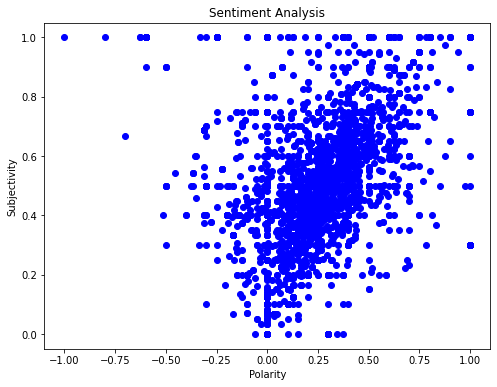

In [56]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [73]:
#percentage of positive tweets about elearning
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']

neutraltweets = df[df.Analysis == 'Neutral']
neutraltweets = neutraltweets['Tweet']

print("Percentage of positive tweets are:- ",round( (ptweets.shape[0] / df.shape[0]) *100, 1))

print("Percentage of Negative tweets are:- ",round( (ntweets.shape[0] / df.shape[0]) *100, 1))

print("Percentage of Neutral tweets are:- ",round( (neutraltweets.shape[0] / df.shape[0]) *100, 1))

Percentage of positive tweets are:-  53.1
Percentage of Negative tweets are:-  5.4
Percentage of Neutral tweets are:-  41.5


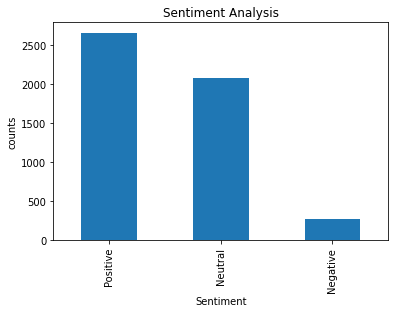

In [77]:
#value count;-

df['Analysis'].value_counts().plot(kind = 'bar')
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("counts")
plt.show()